## KaggleのTGS Salt Identification Challengeのデータセットを使用し、セグメンテーションを行います。


[TGS Salt Identification Challenge | Kaggle](https://www.kaggle.com/c/tgs-salt-identification-challenge)


セグメンテーション手法としてU-Net[1]を使います。


O.Ronneberger, P.Fischer, T.Brox. U-Net: Convolutional Networks for Biomedical Image Segmentation. Medical Image Computing and Computer-Assisted Intervention (MICCAI), Springer, LNCS, Vol.9351: 234–241, 2015

https://arxiv.org/pdf/1505.04597.pdf

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import platform
print("python " + platform.python_version())

import tensorflow as tf
print(tf.__version__)

import keras
print(keras.__version__)

python 3.6.9
2.3.0
2.4.3


In [ ]:
!pip install -U keras

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.4.3)


In [ ]:
!pip install -U tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.3.1)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

os.chdir('/content/drive/My Drive')
print(os.getcwd())

/content/drive/My Drive


In [ ]:
!git clone https://github.com/zhixuhao/unet

fatal: destination path 'unet' already exists and is not an empty directory.


In [ ]:
%cd /content/drive/My Drive/unet

/content/drive/My Drive/unet


In [ ]:
!python main.py

2020-09-29 02:28:04.200820: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-29 02:28:05.471247: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-09-29 02:28:05.473601: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-09-29 02:28:05.474149: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-09-29 02:28:05.474199: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-29 02:28:05.475970: I tensorflow/stream_executor/pl

In [ ]:
#画像を表示させる
import glob
dir_str = "/content/drive/My Drive/unet/data/membrane/test"
imgs = glob.glob(dir_str + '/*' + '.png')

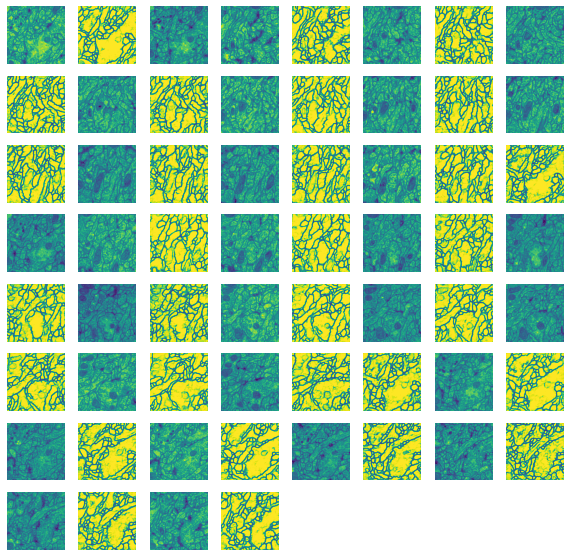

In [ ]:
from matplotlib import pyplot as plt
import cv2
import re
from PIL import Image
import numpy as np

height = 256
width = 256
img_array = np.empty((0, height, width))
n_imgs = len(imgs)


plt.figure(figsize=(10, 10))
for itr, img in enumerate(imgs):
        img_tensor = Image.open(img)
        img_tensor = np.asarray(img_tensor)
        img_tensor = cv2.resize(img_tensor, dsize=(height, width))
        img_tensor = img_tensor.reshape(1, height, width)
        img_array = np.append(img_array, img_tensor, axis=0)

for itr, img in enumerate(img_array):
    plt.subplot(int(np.sqrt(n_imgs))+1, int(np.sqrt(n_imgs))+1, itr+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

## 【問題1】学習・推定
以下のKeras実装を使用して学習・推定を行ってください。


[zhixuhao/unet: unet for image segmentation](https://github.com/zhixuhao/unet)


《GPU環境での学習》


大規模なデータセット、大きなモデルになるため、GPUを使用する必要があります。


《新たなデータセットの適用》


公開されている実装で用意されたものとは異なるデータセットを入力するための準備が必要です。

In [ ]:
!pip install kaggle

In [ ]:
mkdir .kaggle

In [ ]:
ls -a

./  ../  .config/  .kaggle/  sample_data/


In [ ]:
import json

token = {"username":"junichiroiwahara","key":"455a26627d60c8dd27080696a8f4e5c4"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!chmod 600 /content/.kaggle/kaggle.json

In [ ]:
ls -a .kaggle

./  ../  kaggle.json


In [ ]:
!mkdir /root/kaggle/

In [ ]:
ls -a

./  ../  .config/  .kaggle/  sample_data/


In [ ]:
!cp -R /content/.kaggle/kaggle.json /root/.kaggle

In [ ]:
!ls -a /root/.kaggle/

.  ..  kaggle.json


In [ ]:
import os

os.chdir('/content/drive/My Drive/')

# カレントディレクトリの取得
print(os.getcwd())

/content/drive/My Drive


In [ ]:
!kaggle competitions download -c tgs-salt-identification-challenge


train.csv: Skipping, found more recently modified local copy (use --force to force download)
 80% 33.0M/41.4M [00:01<00:00, 9.27MB/s]
100% 41.4M/41.4M [00:01<00:00, 26.0MB/s]
 96% 208M/217M [00:04<00:00, 83.4MB/s]
100% 217M/217M [00:04<00:00, 54.3MB/s]
  0% 0.00/264k [00:00<?, ?B/s]
100% 264k/264k [00:00<00:00, 37.4MB/s]
 89% 145M/163M [00:06<00:01, 17.1MB/s]
100% 163M/163M [00:06<00:00, 27.3MB/s]
 87% 33.0M/37.9M [00:00<00:00, 16.0MB/s]
100% 37.9M/37.9M [00:00<00:00, 43.4MB/s]
  0% 0.00/322k [00:00<?, ?B/s]
100% 322k/322k [00:00<00:00, 46.1MB/s]


In [ ]:
!unzip /content/drive/'My Drive'/train.zip -d train

In [ ]:
!unzip /content/drive/'My Drive'/test.zip -d test

In [ ]:
%cd /content/drive/My Drive/test/images

/content/drive/My Drive/test/images


共有で教えてもらった

In [ ]:
%pushd '/content/drive/My Drive/test/images'
!ls ./*.png | awk '{printf "mv %s %s.png\n",$0,NR-1}' | sh
%popd

/content/drive/My Drive/test/images
mv: './0.png' and '0.png' are the same file
/content/drive/My Drive/test/images
popd -> /content/drive/My Drive/test/images


In [ ]:
# predict作成
!mkdir /content/drive/My Drive/test/predict

In [ ]:
# cat使用してmain.py参照
!cat /content/drive/My\ Drive/unet/main.py

from model import *
from data import *

#os.environ["CUDA_VISIBLE_DEVICES"] = "0"


data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
# 変更
myGene = trainGenerator(2,'/content/drive/My Drive/train','images','masks',data_gen_args,save_to_dir = None)

model = unet(input_size = (256,256,1))
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=300,epochs=1,callbacks=[model_checkpoint])


# 変更
testGene = testGenerator("/content/drive/My Drive/test/images")
results = model.predict_generator(testGene,30,verbose=1)
# 変更
saveResult("/content/drive/My Drive/test/predict",results)

In [ ]:
%cd /content/drive/My\ Drive/unet

/content/drive/My Drive/unet


In [ ]:
!python main.py

2020-09-29 09:19:29.640536: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-29 09:19:31.116055: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-09-29 09:19:31.118530: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-09-29 09:19:31.119071: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-09-29 09:19:31.119111: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-29 09:19:31.120829: I tensorflow/stream_executor/pl

In [ ]:
dir_str = "/content/drive/My Drive/test/predict"
imgs = glob.glob(dir_str + '/*' + '.png')

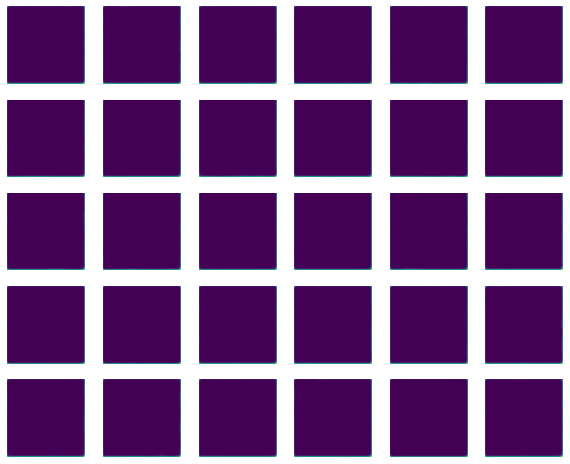

In [ ]:
from matplotlib import pyplot as plt
import cv2
import re
from PIL import Image
import numpy as np

height = 256
width = 256
img_array = np.empty((0, height, width))
n_imgs = len(imgs)


plt.figure(figsize=(10, 10))
for itr, img in enumerate(imgs):
        img_tensor = Image.open(img)
        img_tensor = np.asarray(img_tensor)
        img_tensor = cv2.resize(img_tensor, dsize=(height, width))
        img_tensor = img_tensor.reshape(1, height, width)
        img_array = np.append(img_array, img_tensor, axis=0)

for itr, img in enumerate(img_array):
    plt.subplot(int(np.sqrt(n_imgs))+1, int(np.sqrt(n_imgs))+1, itr+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

なんだこれ？

## 【問題2】コードリーディング
論文[1]に目を通した上で、上記実装のコードリーディングを行ってください

入力 : (conv, conv, MaxPool) 　→ダウンサンプリング : (conv, conv,   (drop), MaxPool )×3  　→中間層 : (conv, conv, drop)  　→アップサンプリング : (up, concat, conv, conv)×3　→出力 : (up, concat, conv, conv, conv, conv)


Uの字になっている